# Sandia System Data
## Import Libraries

In [1]:
# Upgrade command
!pip install --upgrade pip

# Install Requests
!pip install requests

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import json
import requests
import datetime
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from collections import namedtuple
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

### Latitude, Longitude & tz

In [3]:
# Specify Location (Albuquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

## Accessing API with Pandas
### Weather and System Data

In [4]:
# Get Weather Data from URL - May 18 to May 25
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/weather/start/2020-05-22/end/2020-05-25/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
weather_df = pd.DataFrame(response.json())
weather_df.head()

# # Get Weather Data from URL - May 18 to May 25
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/weather/start/2020-05-18/end/2020-05-25/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
weather2_df = pd.DataFrame(response.json())

In [5]:
weather_df.rename(columns={'TmStamp':'TimeStamp', 'GlobalIrrad':'GHI', 'DirectIrrad':'DNI', 'DiffuseIrrad':'DHI'}, inplace=True)
weather2_df.rename(columns={'TmStamp':'TimeStamp', 'GlobalIrrad':'GHI', 'DirectIrrad':'DNI', 'DiffuseIrrad':'DHI'}, inplace=True)

In [6]:
weather_df.head()

,AmbientTemp,DHI,DNI,GHI,RainDailyAccumilation,RelativeHumidity,TimeStamp,WindDirection,WindSpeed
0,15.92,-8.070624,-0.021616,-6.104020,0.0,15.14,1590105660000,91.099998,1.373
1,15.83,-7.960976,0.102011,-6.144083,0.0,15.01,1590105720000,72.820000,1.325
2,15.83,-8.346499,-0.032980,-6.132718,0.0,14.72,1590105780000,77.800003,0.974
3,15.83,-8.383927,-0.115389,-6.127636,0.0,14.66,1590105840000,79.480003,1.576
4,15.68,-7.337333,0.184077,-6.158141,0.0,14.72,1590105900000,73.309998,1.641


In [7]:
# Weather Keys
print("Keys of weather_df: \n{}".format(weather_df.keys()))

Keys of weather_df: 
Index(['AmbientTemp', 'DHI', 'DNI', 'GHI', 'RainDailyAccumilation',
       'RelativeHumidity', 'TimeStamp', 'WindDirection', 'WindSpeed'],
      dtype='object')


In [8]:
# Analyzing Data
# Global Horizonal & Direct Normal(W/m*2)
# Air Temperature (deg C)
weather_df.describe()

,AmbientTemp,DHI,DNI,GHI,RainDailyAccumilation,RelativeHumidity,TimeStamp,WindDirection,WindSpeed
count,4318.000000,4318.000000,4318.000000,4318.000000,4318.0,4318.000000,4.318000e+03,4318.000000,4318.000000
mean,22.203664,40.573988,451.209396,360.524303,0.0,11.334512,1.590235e+12,196.663428,3.540460
std,4.892510,48.701755,454.806608,414.736911,0.0,4.005217,7.481312e+07,78.885852,1.796229
min,11.580000,-10.957648,-0.403672,-6.994774,0.0,4.236000,1.590106e+12,0.000000,0.000000
25%,18.930000,-6.860191,0.195466,-5.926799,0.0,8.170000,1.590170e+12,139.399994,2.104250
50%,22.565000,43.574257,340.447235,111.005852,0.0,10.930000,1.590235e+12,197.600006,3.087000
75%,26.510000,76.738535,944.425598,781.188522,0.0,14.452500,1.590300e+12,250.174999,4.856750
max,30.370001,237.663177,1057.392822,1134.408936,0.0,21.440001,1.590365e+12,359.600006,10.320000


In [9]:
# Analyzing Data - May 18 to 25
# Global Horizonal & Direct Normal(W/m*2)
# Air Temperature (deg C)
weather2_df.describe()

,AmbientTemp,DHI,DNI,GHI,RainDailyAccumilation,RelativeHumidity,TimeStamp,WindDirection,WindSpeed
count,10078.000000,10078.000000,10078.000000,10078.000000,10078.0,10078.000000,1.007800e+04,10078.000000,10078.000000
mean,23.371635,45.261334,435.165144,347.766424,0.0,11.702153,1.590062e+12,198.451310,3.348481
std,5.229943,71.730747,451.097661,405.970463,0.0,4.868514,1.745886e+08,83.896486,1.971533
min,11.130000,-11.335475,-0.429368,-7.579185,0.0,3.308000,1.589760e+12,0.000000,0.000000
25%,19.740000,-7.188381,0.192929,-6.083982,0.0,7.943500,1.589911e+12,139.825001,1.837000
50%,23.500000,39.839403,197.897125,115.443245,0.0,11.230000,1.590062e+12,196.650002,2.837500
75%,27.389999,66.201916,937.891541,736.115356,0.0,14.680000,1.590214e+12,257.175011,4.558750
max,36.080002,594.264526,1057.392822,1336.826538,0.0,29.129999,1.590365e+12,359.799988,12.490000


In [10]:
weather_df_slice = weather_df.iloc[::5] 

In [11]:
weather2_df_slice = weather2_df.iloc[::5] 

### System

In [12]:
# Get System Data from URL
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/system/start/2020-05-22/end/2020-05-25/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
system_df = pd.DataFrame(response.json())
system_df.head()

# Get System Data from URL
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/system/start/2020-05-18/end/2020-05-25/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
system2_df = pd.DataFrame(response.json())

In [13]:
system_df.rename(columns={'TmStamp':'TimeStamp'}, inplace=True)
system2_df.rename(columns={'TmStamp':'TimeStamp'}, inplace=True)

In [14]:
system_df.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
0,15.133332,-2.317497,0.0,0.0,-0.048,2.233333,-2.570174,0.006,2.200000,0.0,1590105660000
1,14.950000,-2.703747,0.0,0.0,-0.048,2.200000,-2.569954,0.006,2.200000,0.0,1590105720000
2,14.908333,-3.186558,0.0,0.0,-0.048,2.216667,-2.569885,0.006,2.216667,0.0,1590105780000
3,14.783333,-3.379683,0.0,0.0,-0.048,2.200000,-2.496124,0.006,2.200000,0.0,1590105840000
4,14.724999,-3.089996,0.0,0.0,-0.048,2.200000,-2.496720,0.006,2.200000,0.0,1590105900000


In [15]:
# System Keys
print("Keys of system_df: \n{}".format(system_df.keys()))

Keys of system_df: 
Index(['AmbientTemp', 'PyranometerIrrad', 'RefCell1Irrad', 'RefCell2Irrad',
       'Sys1Idc', 'Sys1Vdc', 'Sys1Wac', 'Sys2Idc', 'Sys2Vdc', 'Sys2Wac',
       'TimeStamp'],
      dtype='object')


In [16]:
# Analyzing Data
system_df.describe()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
count,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4.319000e+03
mean,21.582117,324.901421,313.367685,310.461126,2.547445,207.269166,810.348778,2.581804,204.217318,832.866320,1.590235e+12
std,4.906876,399.905846,389.485583,387.971251,3.214902,162.690404,996.925519,3.185144,167.641069,1014.225971,7.481593e+07
min,11.250000,-5.793742,0.000000,0.000000,-0.051000,2.200000,-3.964509,0.006000,1.566667,-0.293561,1.590106e+12
25%,17.941666,-2.317497,0.000000,0.000000,-0.045000,2.400000,-2.497607,0.006000,2.166667,0.000000,1.590170e+12
50%,22.041666,48.377747,42.884548,40.421486,0.305750,319.399994,88.301239,0.346000,323.566681,97.399879,1.590235e+12
75%,26.066666,711.278412,692.512177,684.900818,5.707000,340.791672,1859.044067,5.702874,347.741653,1901.237305,1.590300e+12
max,29.483332,1117.806030,1092.269287,1092.101562,8.704750,413.483307,2739.051514,8.915000,398.799957,2791.374268,1.590365e+12


In [17]:
# Analyzing Data
system2_df.describe()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
count,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,1.007900e+04
mean,22.716854,314.720349,303.901841,301.384805,2.469113,206.366031,782.154629,2.504183,203.618466,804.377769,1.590062e+12
std,5.287912,392.285457,382.517326,381.220311,3.157623,162.159149,975.479234,3.130699,166.925158,993.090580,1.745821e+08
min,10.433333,-5.793742,0.000000,0.000000,-0.051000,2.200000,-5.137709,0.006000,1.500000,-0.293561,1.589760e+12
25%,18.800001,-2.607184,0.000000,0.000000,-0.045000,2.400000,-2.497618,0.006000,2.000000,0.000000,1.589911e+12
50%,22.949999,46.349934,40.607960,38.915264,0.287000,318.383331,83.963478,0.323250,321.966675,92.413155,1.590062e+12
75%,26.891665,669.660095,645.779358,641.623138,5.330125,340.258331,1740.652832,5.325375,345.849976,1776.512207,1.590214e+12
max,35.116665,1285.438354,1257.741699,1253.209717,9.634250,419.616669,2969.048828,10.168000,400.783325,3262.633057,1.590365e+12


In [18]:
system_df_slice = system_df.iloc[::5] 

In [19]:
system2_df_slice = system2_df.iloc[::5]

# Weather and System Plot

## Weather May 22 to May 25

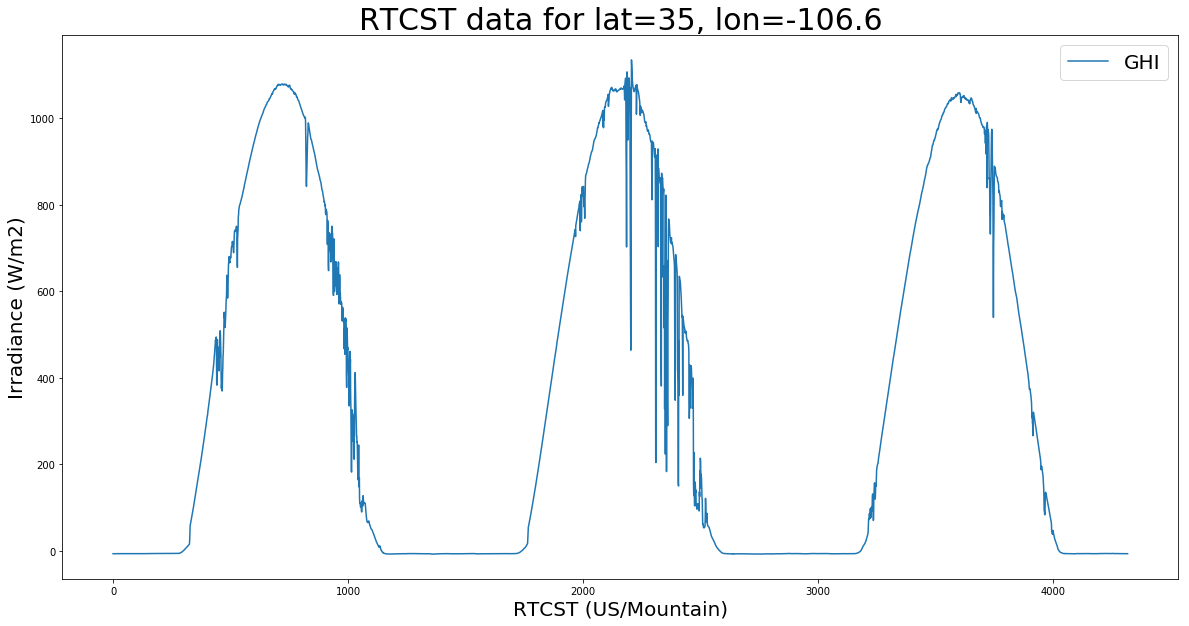

In [20]:
# Plot cloud cover percentages
irrad_var = ['GHI']
weather_df[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

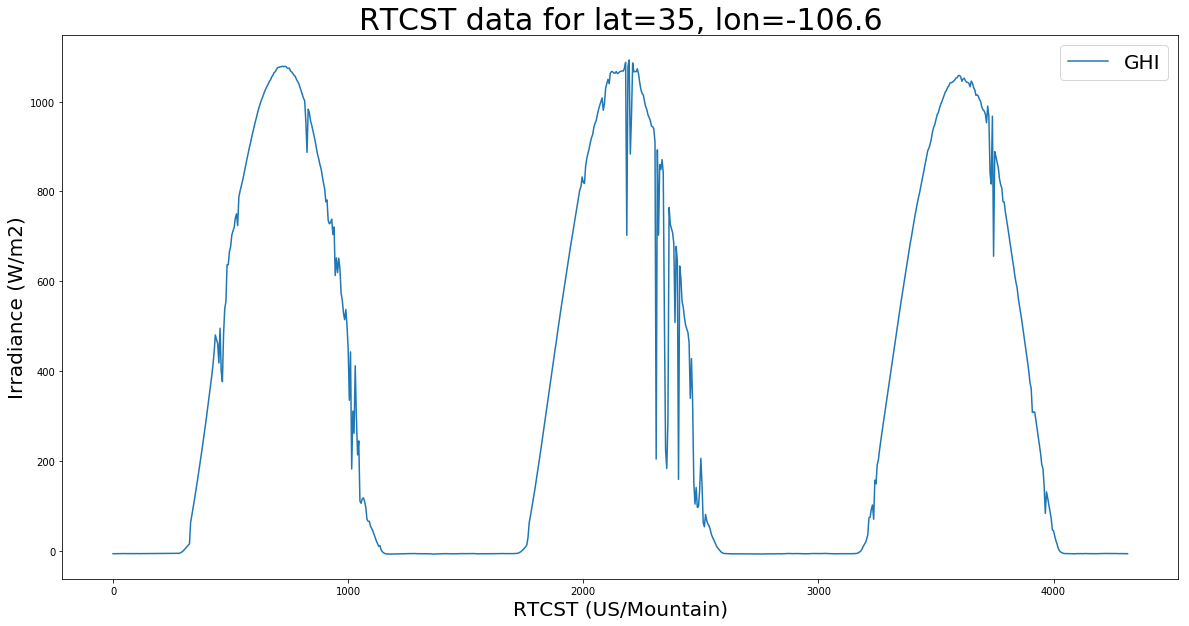

In [21]:
# Plot cloud cover percentages
irrad_var = ['GHI']
weather_df_slice[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

## Weather May 18 to May 25

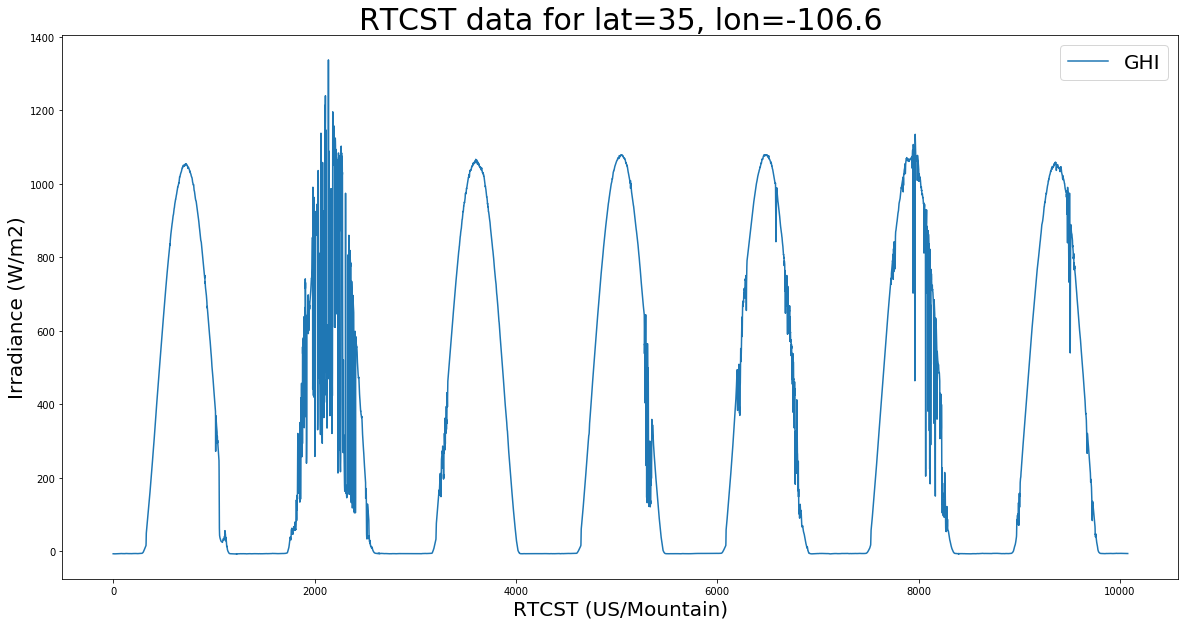

In [22]:
# Plot cloud cover percentages
irrad_var = ['GHI']
weather2_df[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

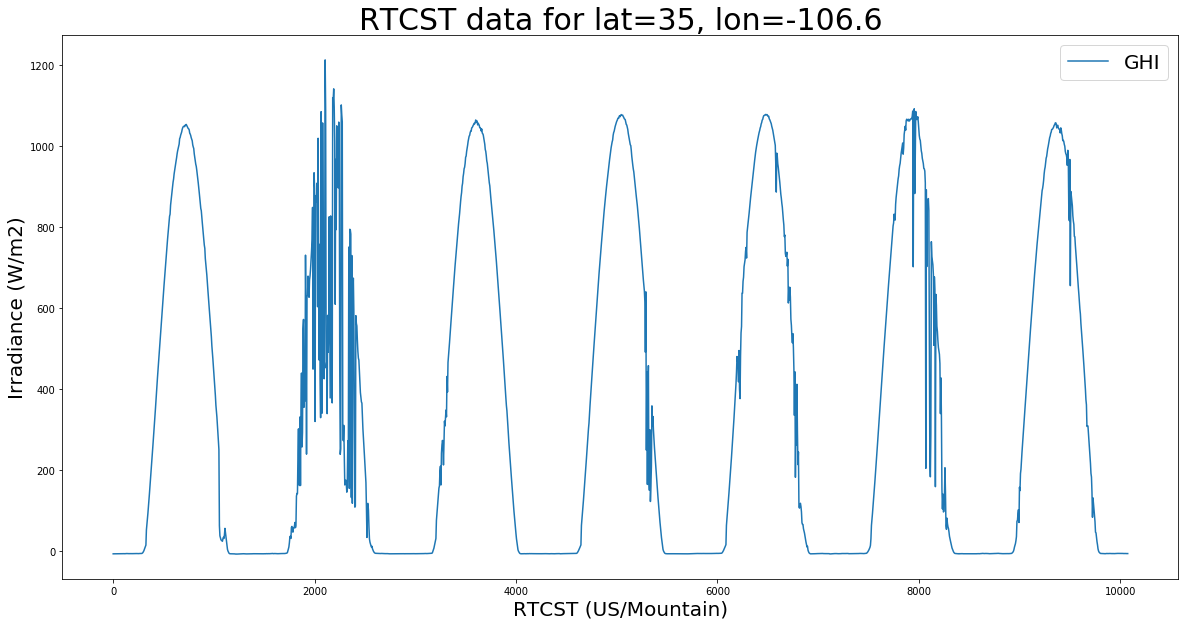

In [23]:
# Plot cloud cover percentages
irrad_var = ['GHI']
weather2_df_slice[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

## System PIV May 22 to May 25

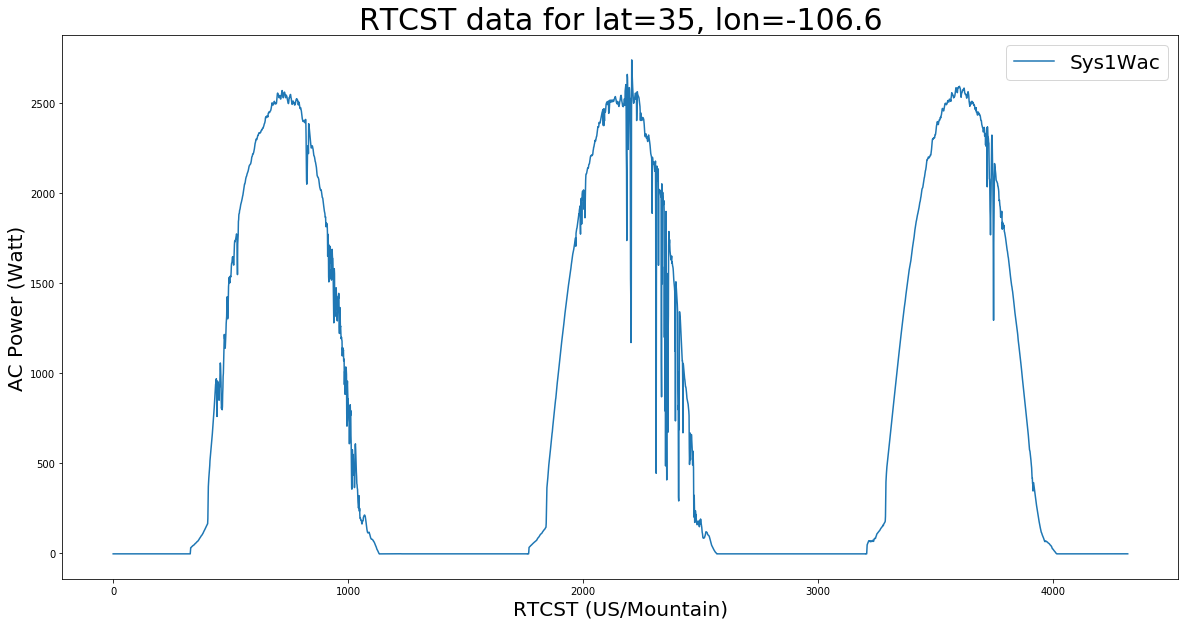

In [24]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Wac']
system_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

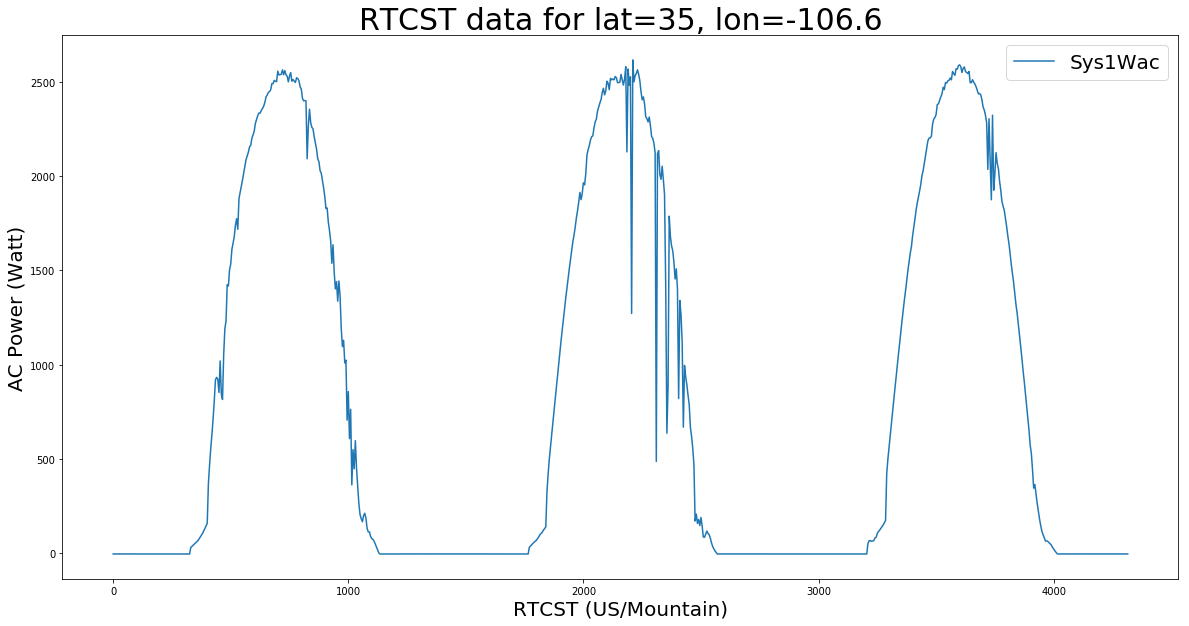

In [25]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Wac']
system_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

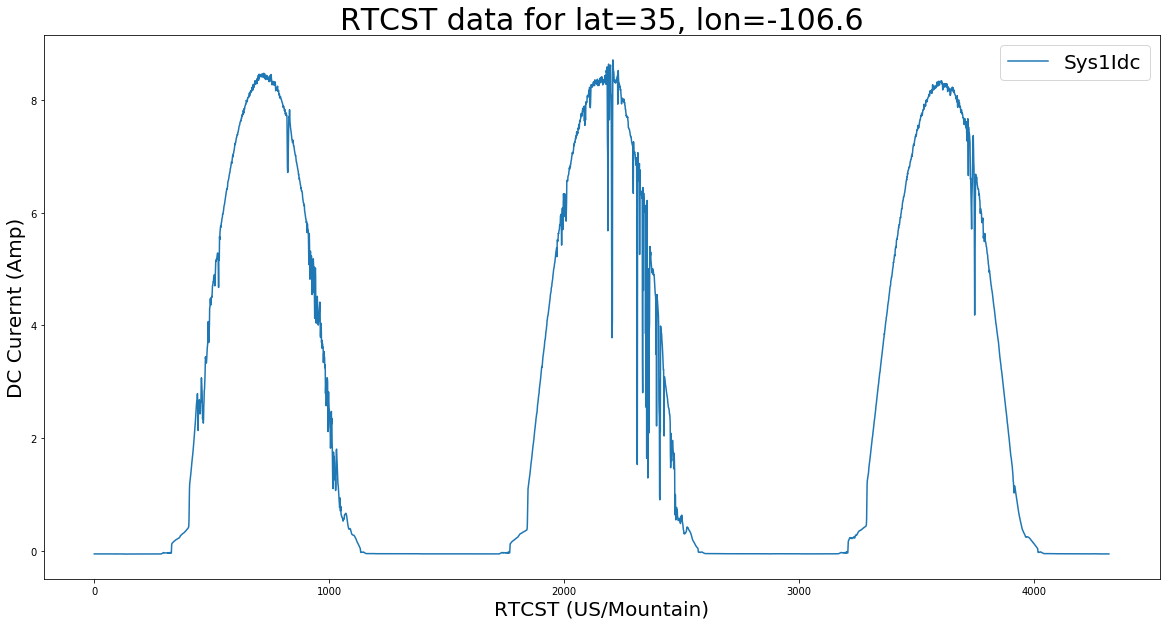

In [26]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Idc']
system_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

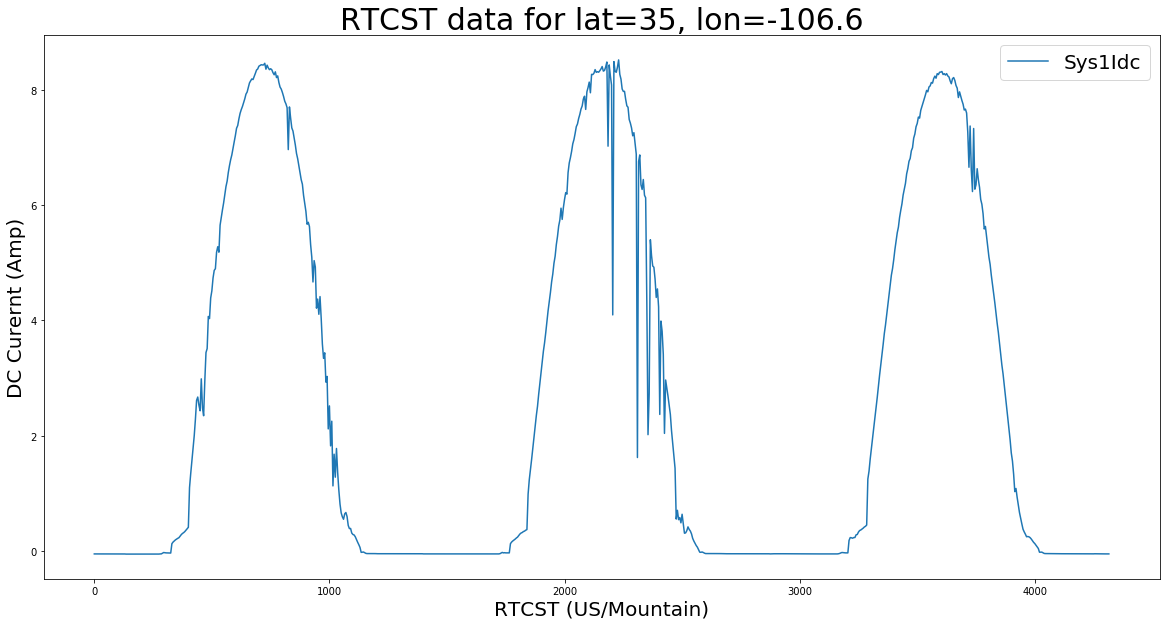

In [27]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Idc']
system_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

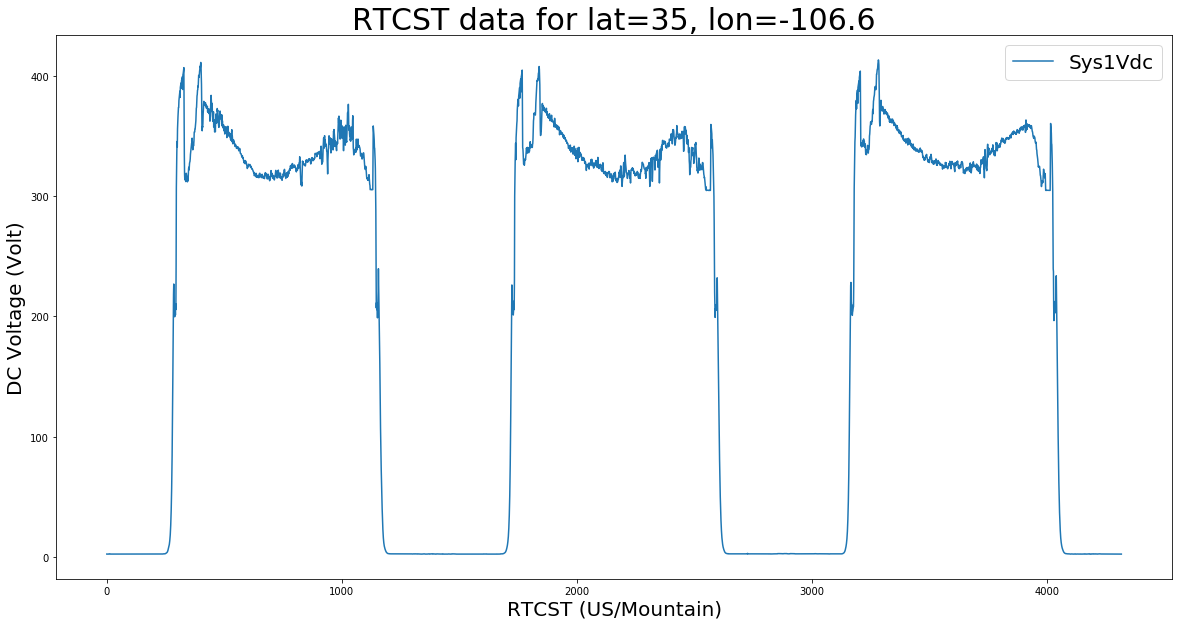

In [28]:
# Plot cloud cover percentages
sys1v_var = ['Sys1Vdc']
system_df[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

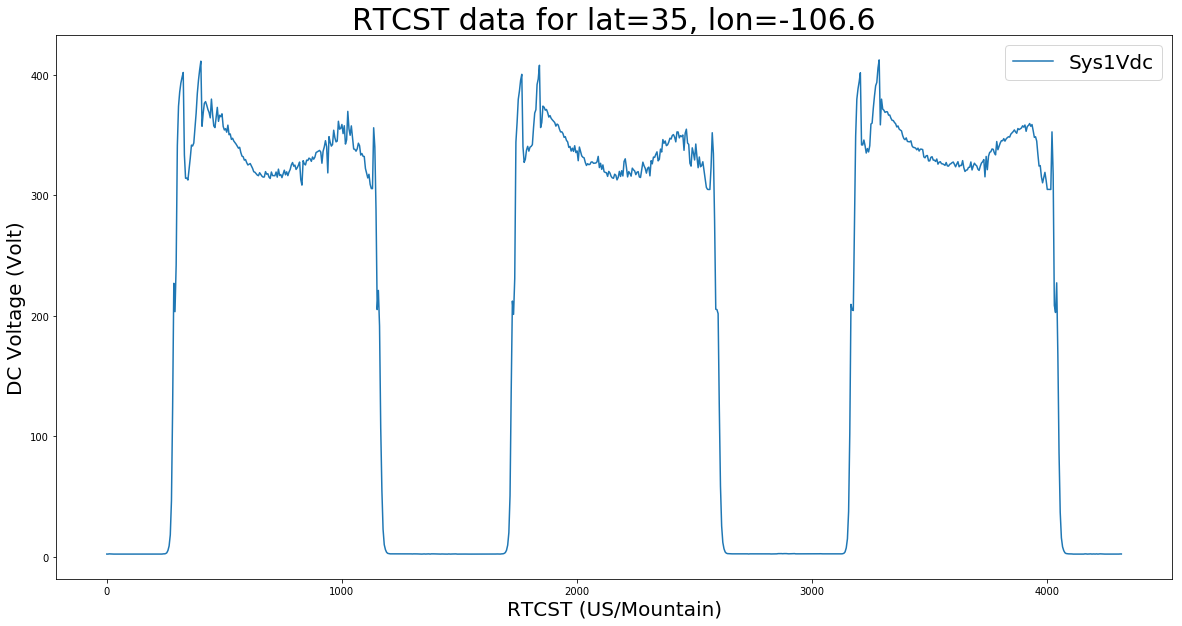

In [29]:
# Plot cloud cover percentages
sys1v_var = ['Sys1Vdc']
system_df_slice[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

## System PIV May 18 to May 25

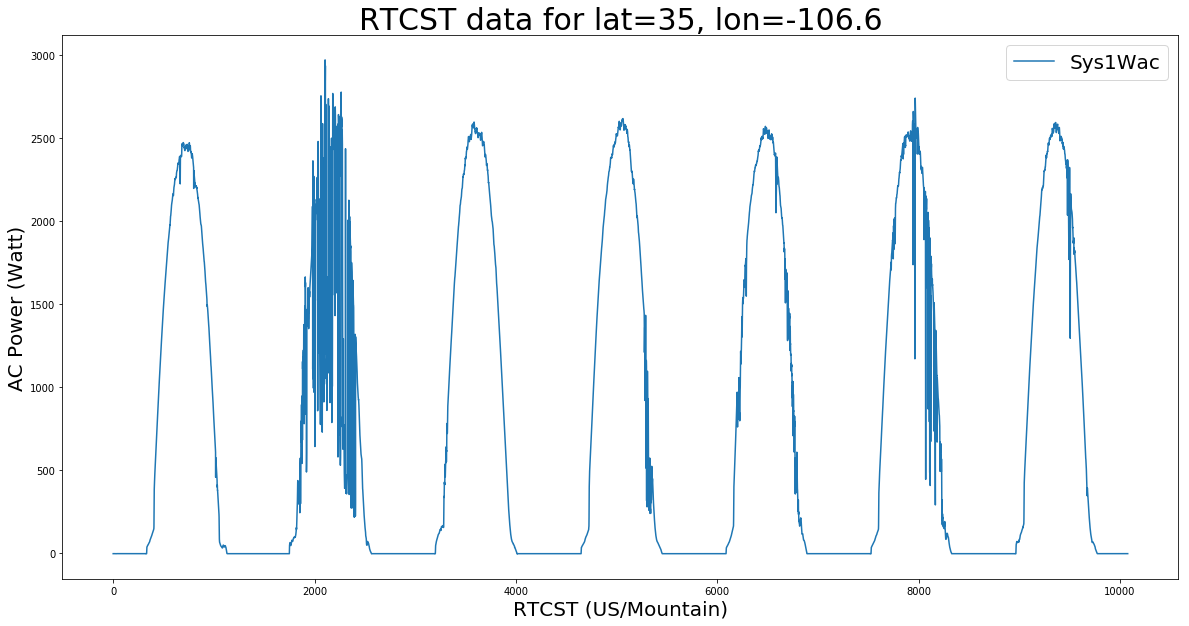

In [30]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Wac']
system2_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

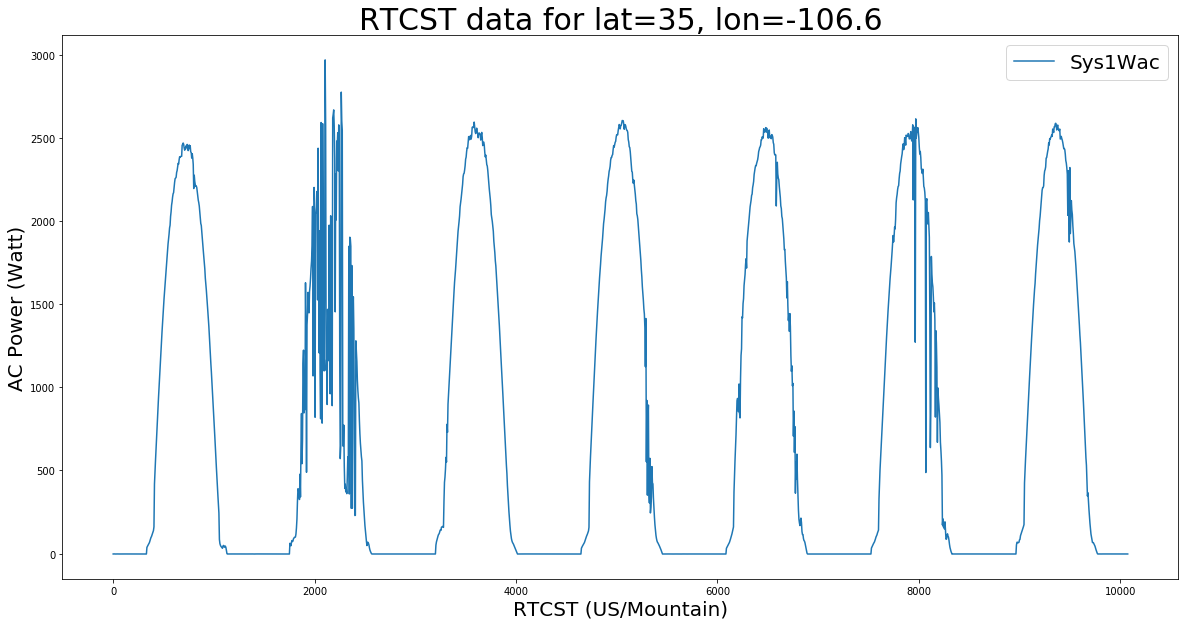

In [31]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Wac']
system2_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

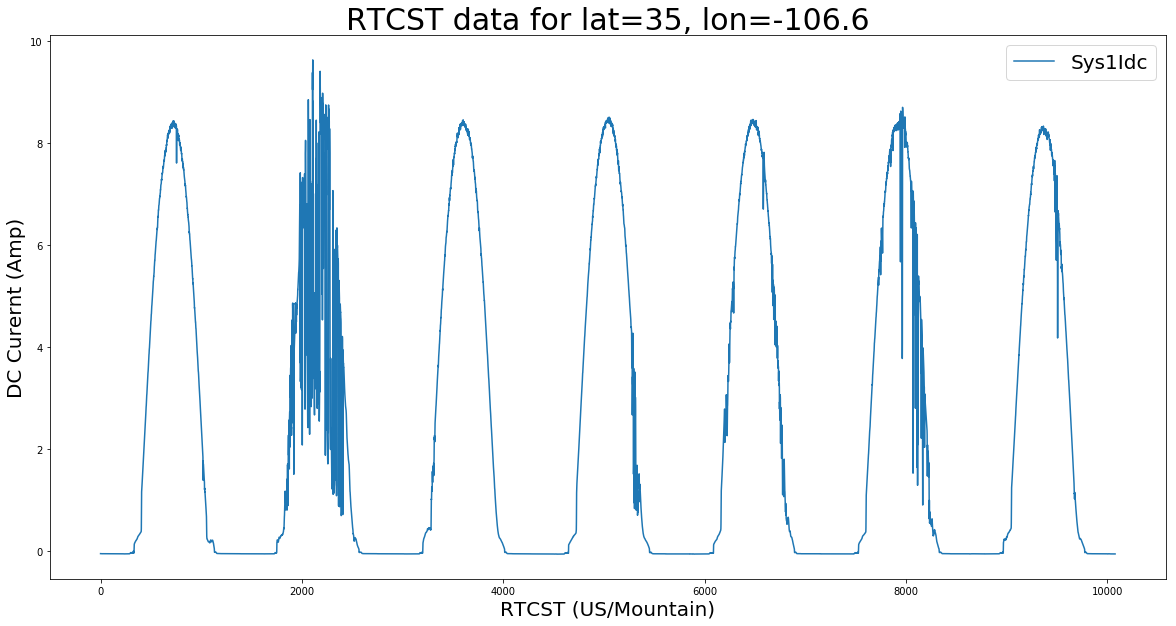

In [32]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Idc']
system2_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

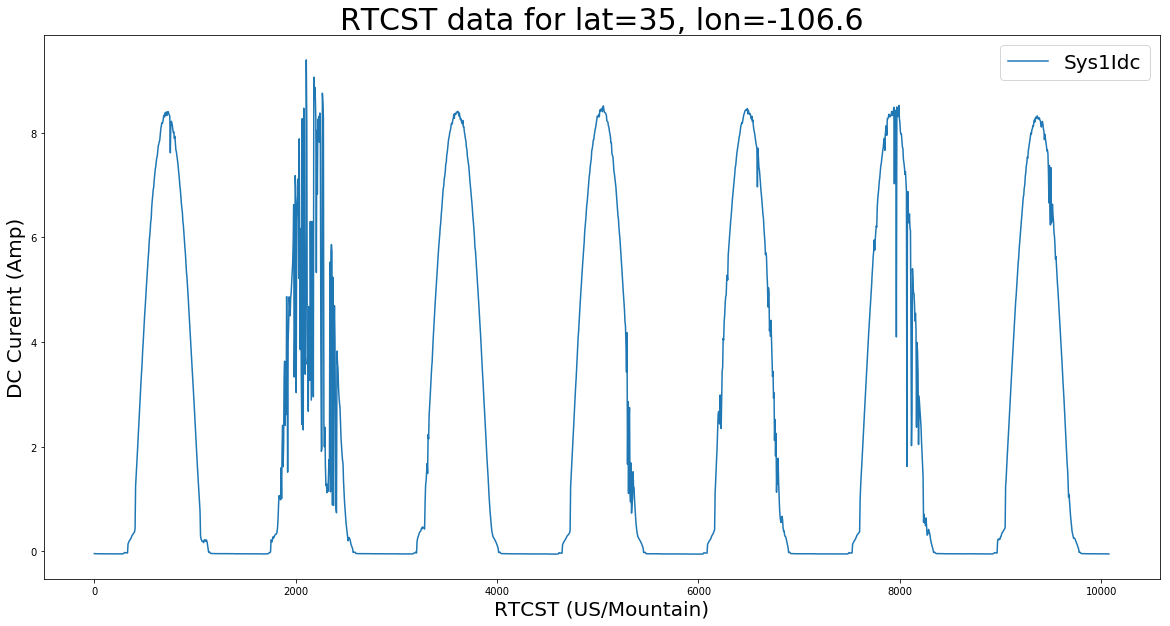

In [33]:
# Plot cloud cover percentages
sys1i_var = ['Sys1Idc']
system2_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

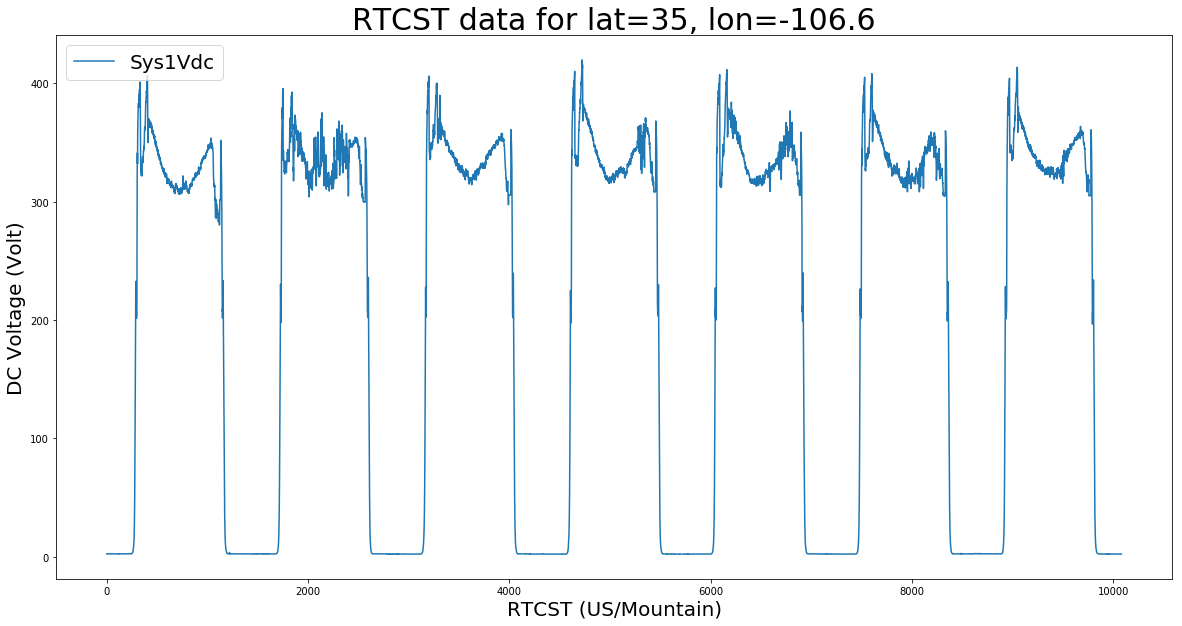

In [34]:
# Plot cloud cover percentages
sys1v_var = ['Sys1Vdc']
system2_df[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

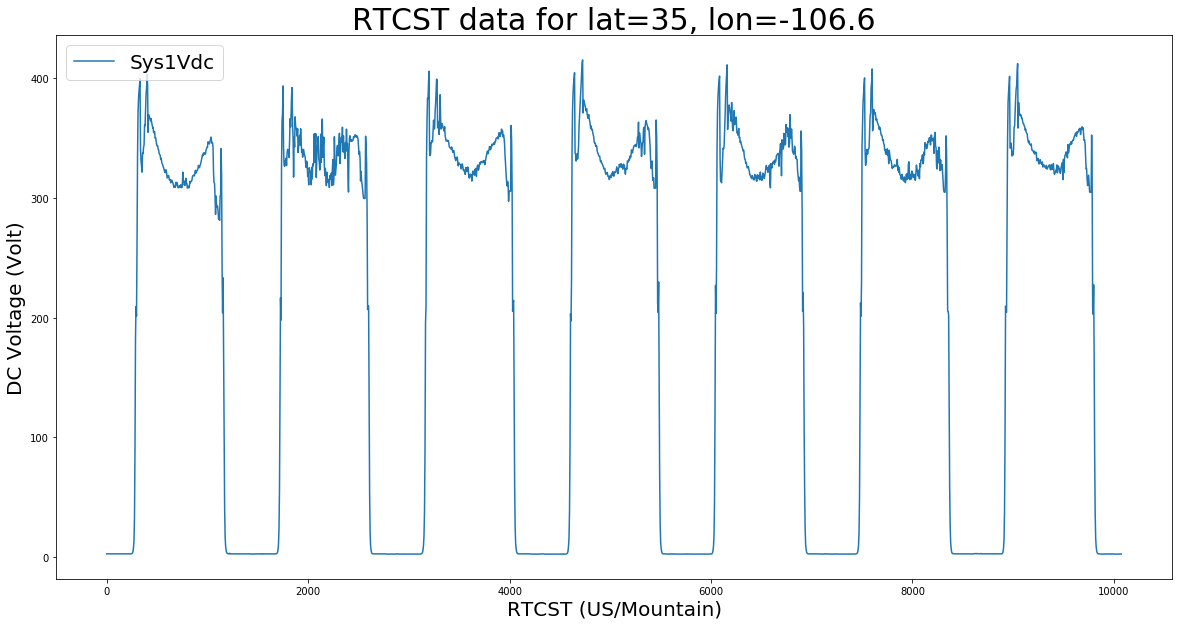

In [35]:
# Plot cloud cover percentages
sys1v_var = ['Sys1Vdc']
system2_df_slice[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

In [36]:
# Read Irradiance data
forecast_df_irrad = pd.read_csv('5 min Irrad 3rd ABQ ORD.csv')
print("Keys of forecast_df_irrad: \n{}".format(forecast_df_irrad.keys()))

Keys of forecast_df_irrad: 
Index(['Unnamed: 0', 'ghi', 'dni', 'dhi'], dtype='object')


In [37]:
forecast_df_irrad.describe()

,ghi,dni,dhi
count,1945.000000,1945.000000,1945.000000
mean,311.763243,273.839569,114.811720
std,351.271385,305.255717,130.324338
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,133.430596,74.863760,75.266829
75%,639.459985,611.249808,212.220653
max,973.680512,758.057143,488.252373


In [38]:
forecast_df_irrad.head()

,Unnamed: 0,ghi,dni,dhi
0,2020-05-18 06:00:00-06:00,0.000000,0.0,0.000000
1,2020-05-18 06:05:00-06:00,0.078719,0.0,0.078719
2,2020-05-18 06:10:00-06:00,0.572488,0.0,0.572488
3,2020-05-18 06:15:00-06:00,1.915673,0.0,1.915673
4,2020-05-18 06:20:00-06:00,4.421121,0.0,4.421121


In [39]:
# Read Irradiance data
forecast_df_ac = pd.read_csv('5 min AC 3rd ABQ ORD.csv')
print("Keys of forecast_df_ac: \n{}".format(forecast_df_ac.keys()))

Keys of forecast_df_ac: 
Index(['2020-05-18 06:00:00-06:00', '0.0'], dtype='object')


In [40]:
forecast_df_ac.describe()

,0.0
count,1944.000000
mean,-84.903936
std,106.038563
min,-537.524536
25%,-195.900000
50%,-20.051915
75%,0.000000
max,120.026286


In [41]:
forecast_df_ac.head()

,2020-05-18 06:00:00-06:00,0.0
0,2020-05-18 06:05:00-06:00,-195.9
1,2020-05-18 06:10:00-06:00,-195.9
2,2020-05-18 06:15:00-06:00,-195.9
3,2020-05-18 06:20:00-06:00,-195.9
4,2020-05-18 06:25:00-06:00,-195.9


In [42]:
# Read Irradiance data
forecast_df_dc = pd.read_csv('5 min DC 3rd ABQ ORD.csv')
print("Keys of forecast_df_dc: \n{}".format(forecast_df_dc.keys()))

Keys of forecast_df_dc: 
Index(['Unnamed: 0', 'i_sc', 'i_mp', 'v_oc', 'v_mp', 'p_mp', 'i_x', 'i_xx'], dtype='object')


In [43]:
forecast_df_dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,1.999114,1.783443,475.258638,382.018586,1168.444840,1.952383,1.294171
std,2.006281,1.787011,399.855351,322.684400,1174.139440,1.960044,1.280845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.507058,1.352193,767.087009,609.183067,884.434696,1.469271,1.047082
75%,4.247590,3.788807,830.637900,667.441073,2420.100924,4.149018,2.731157
max,4.931789,4.373182,861.374268,719.429787,3026.915313,4.819467,3.109709


In [44]:
forecast_df_dc.head()

,Unnamed: 0,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
0,2020-05-18 06:00:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-05-18 06:05:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-05-18 06:10:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-05-18 06:15:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-05-18 06:20:00-06:00,0.084841,0.076876,714.288814,488.273516,37.536332,0.082632,0.061241


In [45]:
y_actual = system2_df_slice['Sys1Wac']
y_actual.describe()

count    2016.000000
mean      781.470696
std       976.284433
min        -3.230705
25%        -2.497613
50%        84.332573
75%      1753.108124
max      2969.048828
Name: Sys1Wac, dtype: float64

In [46]:
y_predicted = system2_df_slice['Sys2Wac']
y_predicted.describe()

count    2016.000000
mean      803.657895
std       993.829256
min        -0.293561
25%         0.000000
50%        91.926964
75%      1786.019165
max      2999.099854
Name: Sys2Wac, dtype: float64

In [47]:
mse = sqrt(mean_squared_error(y_actual, y_predicted))
mse

34.54198057153771

In [48]:
plt.figure(figsize=(30,15))
plt.plot(x,y, label="Sys1 DC")
plt.plot(x,y2, label='Sys2 DC')
plt.ylabel('DC Voltaje (V)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST Data lat={}, lon={}'.format(latitude, longitude),size=20);
plt.legend(prop={'size': 20});
plt.show()

NameError: name 'x' is not defined

<Figure size 2160x1080 with 0 Axes>

In [ ]:
# Plot cloud cover percentages
irrad_var = ['GHI']
weather2_df[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

In [ ]:
# Get data from URL
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/system/start/2020-05-18/end/2020-05-25/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
data = response.json()
x = []
y = []
y2 = []

# print(data)
for record in data:
    x.append(datetime.fromtimestamp(record['TmStamp']/1000))
    y.append(record['Sys1Vdc'])
    y2.append(record['Sys2Vdc'])

plt.figure(figsize=(30,15))
plt.plot(x,y, label="Sys1 DC")
plt.plot(x,y2, label='Sys2 DC')
plt.ylabel('DC Voltaje (V)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST Data lat={}, lon={}'.format(latitude, longitude),size=20);
plt.legend(prop={'size': 20});
plt.show()